<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" />
</p>

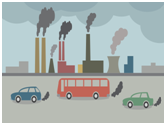

## BEIJING's AIR POLLUTION PREDICTION

**Submitted by NARAYAN V. SHANBHAG**

**GCD Student, INSAID**

**Batch: May 9, 2021**

## Table of Content

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Library Installments](#section3)<br>
    - 3.1 [Installing Libraries](#section301)<br>
    - 3.2 [Importing Libraries](#section302)<br>
4. [Data Acquisition & Descriptions](#section4)<br>
    - 4.1 [Data Description](#section401)<br>
    - 4.2 [Data Information](#section402)<br>
5. [Data Pre-processing](#section5)<br>
    - 5.1 [Pre-profiling Report](#section501)<br>
    - 5.2 [Data Cleaning](#section502)<br>
    - 5.3 [Post-Profiling Report](#section503)<br>    
6. [Exploratory Data Analysis](#section6)<br>
    - 6.1 [Analysis of Features w.r.t.Target variable](#section601)<br>
7. [Data Post-processing](#section7)<br>
    - 7.1 [Handling Categorical columns](#section701)<br>
    - 7.2 [Feature Extraction](#section702)<br>
    - 7.3 [Linear Regression](#section703)<br>


<a name = section1></a>
## 1. Introduction

**Company Introduction**

- **Airifi**, is an **is an air purifier company.**
- One of the leading **Global pollution controller** organizations.
- The company is working its way for the **betterment of the society** by using advanced technologies to purify the air by **removing harmful particles** from the atmosphere.

**Current Scenario**
- As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking up actions in order to tackle the rapid increase in pollution to **avoid global warming.**
- **Beijing’s pollution authority** has collected data for the **past 5 years** and the data has been passed on to your client by the **government of China**


<a name = section2></a>
## 2. Problem Definition

**Currently, Beijing is suffering from:**

- China is **notorious** for being a **major polluter**. Its economic growth in the past **three decades** has been the **fastest** among major nations, which is the main factor in why China has **extensive air pollution.**
- China’s **Environmental Sustainability Index** is ranked near the **bottom among countries worldwide.**
- Air Pollution in Beijing is mainly dominated by **coal combustion** and **vehicles running** on the roads.
- With this **amplified wealth**, individuals are more capable of affording motor vehicles. The number of motor vehicles on Beijing’s roads has doubled to **3.3 million** with nearly **1200 added** each day.

- **Airifi** has hired you as a data science consultant. They want you to come up with actionable insights and a model that could help predict pollution.

- They expect a model that could **predict the daily pollution emission** for Beijing.
- The idea is to use the model in order to take **further action** to **reduce the pollution rate.**

**Your Role:**

- You are given a dataset of the past few years of the **air quality (2013-2017).**
- The data is from the **12 stations** of **Beijing** that have been thoroughly observed.
- Your task is to build a **regression model** using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables:**

- Deliverable: **Predict the particulate matter from the given set of data.**
- Machine Learning Task: **Regression**
- Target Variable: **PM2.5**
- Win Condition: N/A (best possible model)

**Evaluation Metric:**

- The model evaluation will be based on the **RMSE** score.



<a name = section3></a>
## 3. Library Installations

<a name = section301></a>
### 3.1 Installing Libraries

In [ ]:
!pip install -q datascience                                         
# Package that is required by pandas profiling
!pip install -q pandas-profiling                                    
# Library to generate basic statistics about data

# To install more libraries insert your code here..

<a name = section302></a>
### 3.2 Importing Libraries

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

<a name = section4></a>
## 4. Data Acquisition & Description

We are provided with a dataset containing all the necessary information about the air quality of Beijing.

This is the data that we have to predict for future samples.

The dataset is divided into two parts: Train, and Test sets.

**Train Set:**

- The train set contains **403776** rows and **17** columns.
- The train set contains data from **2013-16.**
- The column **PM2.5** is the target variable.

**Test Set:**
- The test set contains **16728** rows and **16** columns.
- The test set contains data for **2017.**
- The test set doesn’t contain the **PM2.5** column.
- PM2.5 needs to be predicted for the test set.

The dataset is divided into two parts:

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**403776**|**17**|**PM5**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**16278**|**16**|**PM5**|


**The model development for Age prediction will be done in Jupyter Notebook.**

 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| REF_NO  |Index of rows|
|02| year    |Contains the year in which the data was Recorded|
|03| month   |Contains the month of the year in which the data was Recorded| 
|04| day     |Contains the day of the month in which the data was Recorded|   
|05| hour    |Contains at what hour of the day the data was Recorded|
|06| PM2.5   |Atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers|
|07| PM10    |Atmospheric particulate matter (PM) that have a diameter less than 10 micrometers|
|08| SO2     |SO2 concentration (ug/m^3)|
|09| NO2     |NO2 concentration (ug/m^3)|
|10| CO      |CO concentration (ug/m^3)|
|11| O3      |Ozone concentration (ug/m^3)|
|12| Temp    |temperature (degree Celsius)|
|13| PRES    |pressure (hPa)|
|14| DEWP    |dew point temperature (degree Celsius) - This is the Temperature at which the **Air needs to be cooled to(at constant pressure)** in order to achieve **Relative Humidity(RH) of 100%**. At this point the air cannot hold more water in the **GAS FORM**|
|15| RAIN    |RAIN in (mm)|
|16| wd      |wind direction|
|17| WSPM    |CO concentration (ug/m^3)|
|18| station |name of the air-quality monitoring site|

In [ ]:
# Loading the Train dataset #
data = pd.read_csv('D:/beijing_train.csv')
print('Data Shape: ', data.shape)
print(data.head())


In [ ]:
data_final = pd.read_csv("D:/beijing_test.csv",skipinitialspace=True)
print('Data Shape:', data_final.shape)
print(data_final.head())

<a name = section402></a>
### 4.2 Data Information

In [ ]:
data.info()

In [ ]:
data_final.info()

## Observations :
 - MOST of the columns other than REF_NO, year. month, day, hour and station have **missing values**  in the TRAINING DATASET
 - There are NO MISSING values in any of the columns of the TESTING DATASET
 - Data Preprocessing report will give clear idea about the dataset.
 

### 4.2 Data Description

In [ ]:
data.describe()

In [ ]:
data_final.describe()

<a name = section5></a>
## 5. Data Pre-processing

### Missing values in various columns

In [ ]:
data.isnull().sum()

In [ ]:
print(data['PM2.5'].median())
print(data['PM2.5'].mean())

In [ ]:
print(data['PM10'].median())
print(data['PM10'].mean())

In [ ]:
print(data['SO2'].median())
print(data['SO2'].mean())

In [ ]:
print(data['NO2'].median())
print(data['NO2'].mean())

In [ ]:
print(data['CO'].median())
print(data['CO'].mean())

In [ ]:
print(data['O3'].median())
print(data['O3'].mean())

In [ ]:
print(data['TEMP'].median())
print(data['TEMP'].mean())

In [ ]:
print(data['PRES'].median())
print(data['PRES'].mean())

In [ ]:
print(data['DEWP'].median())
print(data['DEWP'].mean())

In [ ]:
print(data['RAIN'].median())
print(data['RAIN'].mean())

In [ ]:
print(data['WSPM'].median())
print(data['WSPM'].mean())

In [ ]:
print(data['wd'].mode())

### Replace the MISSING VALUES  and 0s with either MEAN, MEDIAN or MODE as DEEMED FIT

In [ ]:
data['PM2.5'].fillna(value = 55.0, inplace = True)
data['PM10'].fillna(value =  83.0, inplace = True)
data['SO2'].fillna(value =  7.0, inplace = True)
data['NO2'].fillna(value =  43.0, inplace = True)
data['CO'].fillna(value =  900.0, inplace = True)
data['O3'].fillna(value =  45.0, inplace = True)
data['TEMP'].fillna(value =  14.088899474602709, inplace = True)
data['PRES'].fillna(value =  1009.8, inplace = True)
data['DEWP'].fillna(value =  3.1572914472363536, inplace = True)
data['RAIN'].fillna(value =  0.067051782461616, inplace = True)
data['WSPM'].fillna(value =  1.4, inplace = True)
data['wd'].fillna(value =  "NE", inplace = True)

### After replacing the missing values check whether CELLS in any of the COLUMNS are still BLANK
### Also check whether any cells of the Columns have 0s

In [ ]:
data.isnull().sum()

In [ ]:
(data == 0 ).sum(axis = 0)

In [ ]:
data_final.isnull().sum()

In [ ]:
(data_final == 0 ).sum(axis = 0)

### 5.1 Pre-profiling Report

In [ ]:
profile_Train = ProfileReport(df = data, minimal = True)
profile_Train.to_file(output_file = 'D:/Beijing_Air_Pollution_Prediction_Training_Set_PreProfilingReport.html')
print('Pre-Profiling Accomplished!')
profile_Train

In [ ]:
profile_Test = ProfileReport(df = data_final, minimal = True)
profile_Test.to_file(output_file = 'D:/Beijing_Air_Pollution_Prediction_Testing_Set_PostProfilingReport.html')
print('Pre-Profiling Accomplished!')
profile_Test

### Checking for DUPLICATE RECORDS

In [ ]:
data[data.duplicated()]

In [ ]:
data_final[data_final.duplicated()]

<a name = section502></a>
### 5.2 Data Cleaning

## Observations 

- **No missing values** in the **TESTING** datasets.
- **No Duplicate Records/Rows** in both the **TRAINING** as well as **TESTING** datasets after Data Cleaning.

<a name = section503></a>
### 5.3 Post-profiling Report

In [ ]:
post_profile_data = ProfileReport(df = data,explorative = True)
post_profile_data.to_file(output_file = 'Beijing_Air_Pollution_Prediction_Training_Set_PostProfilingReport.html')
print('Post-Profiling Accomplished!')
post_profile_data

In [ ]:
post_profile_data_final = ProfileReport(df = data,explorative = True)
post_profile_data_final.to_file(output_file = 'Beijing_Air_Pollution_Prediction_Testing_Set_PostProfilingReport.html')
print('Post-Profiling Accomplished!')
post_profile_data_final

<a name = section6></a>
## 6. Exploratory Data Analysis

In [ ]:
sns.distplot(data['PM2.5'])

## Observations

 - There is **SKEWNESS** in the target variable i.e. **PM 2.5 levels** and it is **RIGHT SKEWED**.


In [ ]:
sns.distplot(data['PM10'])

In [ ]:
sns.distplot(data['PRES'])

In [ ]:
sns.distplot(data['RAIN'])

In [ ]:
fig = plt.figure(figsize = (10,7))
data['wd'].value_counts().plot(kind = 'bar', cmap = 'autumn')
plt.ylabel('Count', size = 14)
plt.xlabel('Wind Directon', size = 14)
plt.title('Wind Direction', size = 16)
plt.grid()

In [ ]:
sns.distplot(data['TEMP'])

<a name = section601></a>
### 6.1 Analysis of features w.r.t. Target Variable

In [ ]:
# Which Stations have recorded the HIGHEST PM 2.5 levels?
figure = plt.figure(figsize = (20,8))
pollution_level = data.groupby('station')['PM2.5'].mean()
pollution_level.plot.bar(color = 'Blue')
plt.xlabel('station', size = 14)
plt.ylabel('PM 2.5 Levels', size = 14)
plt.title('STATION v/s PM 2.5 levels', size = 16)
plt.xticks(size = 12)
plt.grid()

In [ ]:
# Which year had recorded the HIGHEST PM 2.5 levels?
figure = plt.figure(figsize = (20,8))
pollution_level = data.groupby('year')['PM2.5'].mean()
pollution_level.plot.bar('PM2.5',color = 'Tomato')
plt.xlabel('YEAR', size = 14)
plt.ylabel('PM 2.5 Levels', size = 14)
plt.title('YEAR v/s PM 2.5 levels', size = 16)
plt.xticks(size = 12)
plt.grid()

In [ ]:
# Which month had recorded the HIGHEST PM 2.5 levels?
figure = plt.figure(figsize = (20,8))
#figure = figure.add_axes(['month'])
#pollution_level = data.sort_index('year')
pollution_level = data.groupby('month')['PM2.5'].mean()   # value_counts().sort_values(ascending = False)[:15]
#pollution = data.PM2.5.sort_values(ascending=False)[:15]
#pollution = data_PM2.5.groupby('station')['PM2.5']#.sort_values(ascending=False)[:15]
pollution_level.plot.bar(color = 'Blue')
plt.xlabel('Month', size = 14)
plt.ylabel('PM 2.5 Levels', size = 14)
plt.title('MONTH v/s PM 2.5 levels', size = 16)
plt.xticks(size = 12)
plt.grid()



In [ ]:
data.info()

### Correlation between FEATURES using PAIRPLOT, HEATMAP and VIF

In [ ]:
# Correlation between Features
sns.pairplot(data= data[['PM2.5','year','month','day','hour','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM','station']], height = 4, aspect = 1.5)

In [ ]:
data_checking = data[['PM2.5','year','month','day','hour','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM','station']]

In [ ]:
figure = plt.figure(figsize = (15,5))
HeatMap = sns.heatmap(data_checking.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

In [ ]:
data_checking = data[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

c = data_checking.iloc[::-1]
calc_vif(c)

In [ ]:
data[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].plot(kind='box', figsize=(20, 7), vert=False)

## Observations

 - **PM5** is having **Strong Positive correlation** with **PM10, SO2, NO2 and CO.**
 - Check for Correlation values **0.5 to 1** and **-1 to -0.5**
 - Also these Independent variables **PM10, SO2, NO2, CO** have High Collinearity amongst themselves, which is a **TYPICAL CASE**
 - Some independent variables, **TEMP and DEWP,** **TEMP and O3** are **Positively highly correlated**, resulting in **Multicollinearity.**
 - Some independent variables, **TEMP and PRES,** **PRES and DEWP** are **Negatively highly correlated**, resulting in **Multicollinearity.**
 - **TEMP & DEWP** and **PRES & TEMP** both have the **SAME CORRELATION COEFFIECIENT** but one is **POSITIVE** and the other **NEGATIVE**

<a name = section7></a>
## 7. Data Post-processing

 - **Machine Learning Algorithm** works with **numerical** values.
 - So, it is necessary to **convert the categorical columns into Numerical columns.**

<a name = section701></a>
### 7.1 Handling Categorical and Numerical columns 

### (A) Categorical Columns : 
**wd**  and **station** are the only 2 Categorical columns in the DataSet

### (B) Numerical Columns:
**PM2.5','year','month','day','hour','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM',** are the Numerical Columns

In [ ]:
data.columns


In [ ]:
data_categorical = data[['month','day','hour','wd','station']]
data_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_categorical = data_categorical.apply(LabelEncoder().fit_transform)
data_categorical

In [ ]:
data_numerical = data[['SO2', 'NO2','CO', 'O3', 'DEWP', 'RAIN']]
data_numerical

In [ ]:
data_model = pd.concat([data_categorical,data_numerical], axis=1)
data_model

In [ ]:
data_intermediate = data[['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
data_intermediate

## VIF ==> Variance Inflation Factor
- **Checking Multicollinearity using VIF**
- **Supports only NUMERICAL values, STRING and LOGICAL COLUMNS to be dropped**
- **The values cannot be BLANK or NaN**
- **VIF or Variable Inflation Factor is used to identify the correlation of 1 INDEPENDENT VARIABLE(PREDICTOR) with a group of OTHER VARIABLES(PREDICTORS)**
- **VIF is the RECIPROCAL of TOLERANCE VALUE**
- **A RULE OF THUMB commonly used in PRACTICE is; if VIF < 3 it is IDEAL and if  VIF > 10, you have HIGH MULTICOLLINEARITY**

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

c = data_intermediate.iloc[::-1]
calc_vif(c)

### Picking only the required FEATURES and Re-arranging the data set as per our need
#### Dropping the Columns Length, Diameter, Whole_weight, Sucked_weight, Viscera_weight from the FEATURES as these are HIGHLY MULTICOLLINEAR as observed from the PAIRPLOT, HEATMAP and VIF

<a name = section702></a>
### 7.2 Feature Extraction

### Split the data into x and y. Meaning y is the DEPENDENT/TARGET variable and x as FEATURE/INDEPENDENT variable

In [ ]:
x = data_model
x

In [ ]:
y = data['PM2.5']
y

### Split the data into x and y. Meaning y is the DEPENDENT/TARGET variable and x as FEATURE/INDEPENDENT variable


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Print the shape/size of the Training and Testing data

In [ ]:
print("TRAINING CASES as below:")
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("TESTING CASES as below:")
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

<a name = section703></a>
### 7.3 Linear Regression

**Here, we will use these 4 steps :** 

 - (a) Load the algorithm 
 - (b) Instantiate and Fit the model/Train the model using the training dataset
 - (c) Prediction on the test set
 - (d) Evaluate the model - Calculate RMSE the GO-TO METRIC

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [ ]:
lr_model.fit(x_train, y_train)

In [ ]:
y_pred_train = lr_model.predict(x_train) 
y_pred_train


In [ ]:
y_pred_test = lr_model.predict (x_test)
y_pred_test

## Different Metrics for Evaluation of the LINEAR MODEL

### RMSE is the GO-TO Metric here

In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

### We have also calculated other Metrics viz. 
### MAE (Mean Average Error)
### MLSE (Mean squared logarithmic Error) --- if there are NEGATIVE values in the DataSet then we cannot APPLY this SCORE
### R2 or R-SQUARED ERROR
### MAPE (Mean Average Percentage Error)

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [ ]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

### We cannot apply MLSE Score here as the TARGET VARIABLE PM2.5 has NEGATIVE VALUES

In [ ]:
#MLSE_train = metrics.mean_squared_log_error(y_train, y_pred_train)
#MLSE_test = metrics.mean_squared_log_error(y_test,y_pred_test)
#print('Mean squared logarithmic Error(RMLSE) of train data:',MLSE_train)
#print('Mean squared logarithmic Error(RMLSE) of test data:',MLSE_train)

In [ ]:
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

In [ ]:
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_pred_train)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE of train data:',MAPE_train)
print('MAPE of test data:',MAPE_test)

## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [ ]:
data_submission = data_final['REF_NO']
data_submission

In [ ]:
data_final_categorical = data_final[['month','day','hour','wd','station']]
data_final_categorical

In [ ]:
data_final_numerical = data_final[['SO2', 'NO2','CO', 'O3', 'DEWP', 'RAIN']]
data_final_numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_final_categorical = data_final_categorical.apply(LabelEncoder().fit_transform)
data_final_categorical

In [ ]:
data_final_model = pd.concat([data_final_categorical,data_final_numerical], axis=1)
data_final_model

In [ ]:
y_pred_test_final = lr_model.predict(data_final_model)
y_pred_test_final
y_pred_test_final.shape

### Convert the array into a DataFrame

In [ ]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)

In [ ]:
y_pred_test_final

### Prepare the submission file which should have only two columns viz. the KEY/INDEX column(customerID) and TARGET column(Churn)

In [ ]:
submission_file = pd.concat([data_submission,y_pred_test_final], axis = 1)

In [ ]:
submission_file

### To write the final data to the submission file which is .csv without HEADER and INDEX

In [ ]:
submission_file.to_csv('D://Beijings_air_pollution_prediction_submission_new.csv', header=False, index=False)

## THANK YOU !!!!